# **Sales Prediction using Python**

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

# 1. Import Libraries and Load Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/content/advertising.csv')

In [9]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# 2. Data Preprocessing

In [21]:
data = data.dropna()

In [22]:
data = pd.get_dummies(data, drop_first=True)

In [23]:
X = data.drop('Sales', axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Exploratory Data Analysis (EDA)

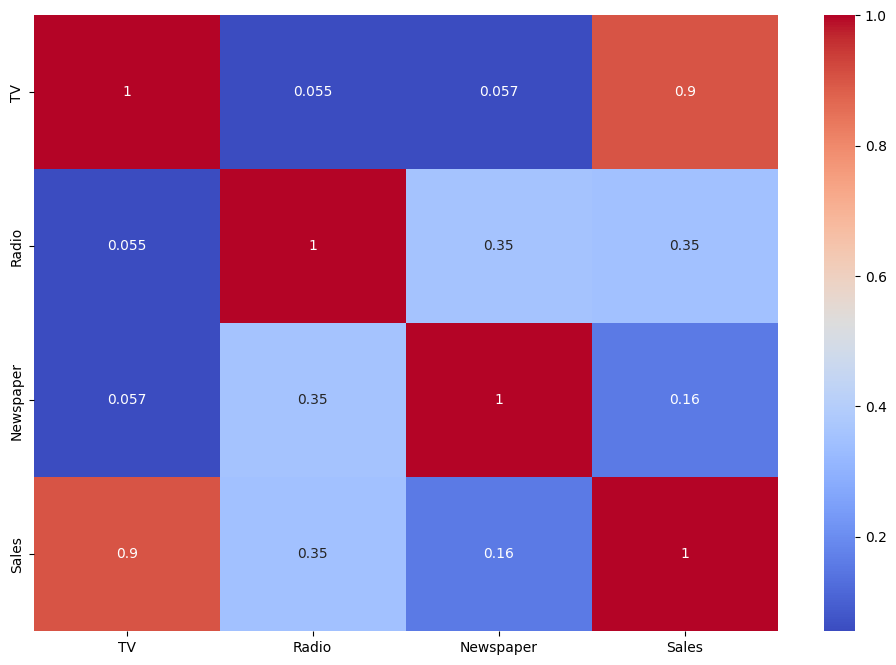

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 4. Model Building


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 5. Model Evaluation

In [31]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
R-squared: 0.9059011844150826


# 6. Model Tuning

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [33]:
rf_model = RandomForestRegressor(random_state=42)

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [35]:
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (Random Forest):", mae_rf)
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)
print("R-squared (Random Forest):", r2_rf)

Mean Absolute Error (Random Forest): 0.9030916666666637
Mean Squared Error (Random Forest): 1.3925538416666583
Root Mean Squared Error (Random Forest): 1.1800651853464106
R-squared (Random Forest): 0.9549351368829375
